# <center><u>**`LOGISTIC REGRESSION`**</u></center>


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
churn_data = pd.read_csv('churn_data.csv')
customer_data = pd.read_csv('customer_data.csv')
internet_data = pd.read_csv('internet_data.csv')

In [ ]:
df_1 = pd.merge(churn_data,customer_data, how='inner',on='customerID'  )

In [ ]:
telecom = pd.merge(df_1,internet_data, how='inner',on='customerID'  )

In [ ]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [ ]:
telecom['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


## **`Data Preparation`**

In [ ]:
telecom['PhoneService'] =  telecom['PhoneService'].map({'Yes':1, 'No':0})
telecom['PaperlessBilling'] =  telecom['PaperlessBilling'].map({'Yes':1, 'No':0})
telecom['Churn'] = telecom['Churn'].map({'Yes':1, 'No':0})
telecom['Partner'] = telecom['Partner'].map({'Yes':1, 'No':0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes':1, 'No':0}) 

In [ ]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [ ]:
from pandas._libs.lib import generate_slices
cont = pd.get_dummies(telecom['Contract'],prefix='Contract', drop_first = True)
telecom = pd.concat([telecom, cont], axis=1)

pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod' ,drop_first = True)
telecom = pd.concat([telecom, pm], axis=1)

gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first = True)
telecom = pd.concat([telecom, gen], axis=1)

ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
ml1 = ml.drop(['MultipleLines_No phone service'],1)
telecom = pd.concat([telecom, ml1], axis=1)

iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first = True)
telecom = pd.concat([telecom, iser], axis=1)

os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'],1)
telecom = pd.concat([telecom, os1], axis=1)

ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'],1)
telecom = pd.concat([telecom, ob1], axis=1) 

dp =pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop([ 'DeviceProtection_No internet service'],1)
telecom = pd.concat([telecom, dp1], axis=1)

ts =pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 =  ts.drop(['TechSupport_No internet service'],1)
telecom = pd.concat([telecom, ts1], axis=1)

st = pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
telecom = pd.concat([telecom, st1], axis=1)

sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 =  sm.drop(['StreamingMovies_No internet service'],1)
telecom =  pd.concat([telecom, sm1], axis=1)

C:\Users\admin\AppData\Local\Temp\ipykernel_5728\2174854827.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['MultipleLines_No phone service'],1)
C:\Users\admin\AppData\Local\Temp\ipykernel_5728\2174854827.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  os1 = os.drop(['OnlineSecurity_No internet service'],1)
C:\Users\admin\AppData\Local\Temp\ipykernel_5728\2174854827.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ob1 = ob.drop(['OnlineBackup_No internet service'],1)
C:\Users\admin\AppData\Local\Temp\ipykernel_5728\2174854827.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dp1 = dp.drop([ 'DeviceProtection_

In [ ]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
telecom.shape

(7043, 43)

In [ ]:
telecom = telecom.drop(['Contract',
'PaymentMethod',
'gender',
'MultipleLines',
'InternetService', 
'OnlineSecurity', 
'OnlineBackup', 
'DeviceProtection',
'TechSupport', 
'StreamingTV', 
'StreamingMovies'],1)


C:\Users\admin\AppData\Local\Temp\ipykernel_5728\4099526894.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  telecom = telecom.drop(['Contract',


In [ ]:
telecom.shape

(7043, 32)

In [ ]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [ ]:
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'], errors='coerce')


In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

### **`Checking for Outliers`**

In [ ]:
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [ ]:
num_telecom.describe(percentiles=[.25,.5,.75,.9,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliner in your data as the numbers are gradually increasing.

### **`Checking for Missing Values and Inputing Them`**

In [ ]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [ ]:
#percentage of missing values
round((telecom.isnull().sum()/len(telecom.index))* 100, 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [ ]:
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [ ]:
round((telecom.isnull().sum()/len(telecom.index))* 100, 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

In [ ]:
df = telecom[['tenure','MonthlyCharges' ,'TotalCharges']]

In [ ]:
std=(df-df.mean())/df.std()

In [ ]:
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'],1)

C:\Users\admin\AppData\Local\Temp\ipykernel_5728\2848484168.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'],1)


In [ ]:
telecom = pd.concat([telecom, std], axis=1)

In [ ]:
telecom.tail()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,...,1,0,1,0,1,0,1,-0.343113,0.664821,-0.129171
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,...,1,1,0,0,1,0,1,1.612459,1.276402,2.240896
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,...,0,1,0,1,0,1,0,-0.872746,-1.169921,-0.854453
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.157934,0.319145,-0.872033
7042,3186-AJIEK,1,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,1.368012,1.357835,2.012201


### **`Checking the Churn Rate`**

In [ ]:
churn = sum((telecom['Churn'])/len(telecom['Churn'].index))*100

In [ ]:
churn

26.57849829351494

## **`Model Building`**

In [ ]:
X = telecom.drop(['customerID', 'Churn'],1)
y = telecom['Churn']

C:\Users\admin\AppData\Local\Temp\ipykernel_5728\3564434599.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = telecom.drop(['customerID', 'Churn'],1)


In [ ]:
X.head()

,PhoneService,PaperlessBilling,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,1,0,0,0,0,1,0,0,0,1,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,1,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,0,0,0,0,0,1,0,0,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,1,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
import statsmodels.api as sm

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [ ]:
logm1 = sm.Logit(y_train, X_train)
logm1.fit().summary()

Optimization terminated successfully.
         Current function value: 0.410629
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4897
Method:                           MLE   Df Model:                           24
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                  0.2908
Time:                        17:37:11   Log-Likelihood:                -2021.1
converged:                       True   LL-Null:                       -2849.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.6511   1.66e+06   -1.6e-06      1.000   -3.25e+06    3.25e+06
PhoneService                              0.5240        nan        nan        nan         nan         nan
PaperlessBilling                          0.2066      0.089      2.327      0.020       0.033       0.381
SeniorCitizen                             0.2268      0.101      2.235      0.025       0.028       0.426
Partner                                   0.1332      0.094      1.420      0.155      -0.051       0.317
Dependents                               -0.2451      0.109     -2.240      0.025      -0.460      -0.031
Contract_One year                        -0.8185      0.133     -6.177      0.000      -1.078      -0.559
Contract_Two year                        -1.4284      0.209     -6.823      0.000      -1.839      -1.018
PaymentMethod_Credit card (automatic)    -0.1625      0.137     -1.186      0.236      -0.431       0.106
PaymentMethod_Electronic check            0.2029      0.113      1.790      0.073      -0.019       0.425
PaymentMethod_Mailed check               -0.1224      0.138     -0.886      0.376      -0.393       0.148
gender_Male                              -0.0202      0.078     -0.259      0.796      -0.173       0.133
MultipleLines_No                          0.0295        nan        nan        nan         nan         nan
MultipleLines_Yes                         0.4945        nan        nan        nan         nan         nan
InternetService_Fiber optic               2.1963      0.965      2.275      0.023       0.304       4.088
InternetService_No                       -2.7382   1.66e+06  -1.65e-06      1.000   -3.25e+06    3.25e+06
OnlineSecurity_No                         0.1093        nan        nan        nan         nan         nan
OnlineSecurity_Yes                       -0.0222        nan        nan        nan         nan         nan
OnlineBackup_No                          -0.0415        nan        nan        nan         nan         nan
OnlineBackup_Yes                          0.1286        nan        nan        nan         nan         nan
DeviceProtection_No                      -0.0706        nan        nan        nan         nan         nan
DeviceProtection_Yes                      0.1577        nan        nan        nan         nan         nan
TechSupport_No                            0.0935        nan        nan        nan         nan         nan
TechSupport_Yes                          -0.0064        nan        nan        nan         nan         nan
StreamingTV_No                           -0.3381   2.23e+06  -1.52e-07      1.000   -4.36e+06    4.36e+06
StreamingTV_Yes                           0.4252   2.17e+06   1.96e-07      1.000   -4.26e+06    4.26e+06
StreamingMovies_No                       -0.3395   1.04e+06  -3.27e-07      1.000   -2.04e+06    2.04e+06
StreamingMovies_Yes                       0.4266   1.04e+06  

there few statistically insignificant variables present in our dataset 

In [ ]:
X.drop(['Partner',
'Dependents'   , 
'PaymentMethod_Electronic check'   , 
'gender_Male',
'InternetService_No',
'DeviceProtection_No',
'DeviceProtection_Yes'],1,inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_5728\1075001843.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X.drop(['Partner',


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

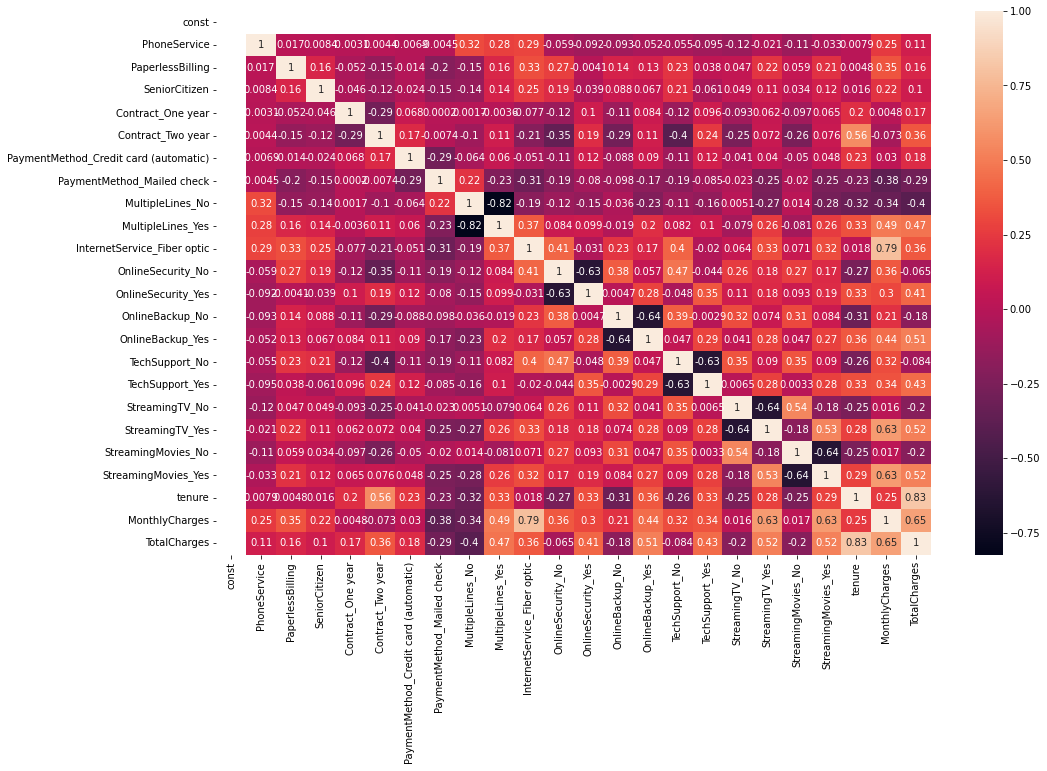

In [ ]:
plt.figure(figsize = (16,10))     
sns.heatmap(X.corr(),annot=True)

In [ ]:
# correlation function to drop correlleation function to remove highly correlated variables (>70%)
def correlation(dataset, threshold):
    # Set of all the names of correlated columns
    col_corr =set()
    
    # apply corr method on dataset
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):

            # absolute coeff value 
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                # getting the name of column
                colname = corr_matrix.columns[i]
                col_corr.add(colname) 
                # add in col_corr 
                
        return col_corr
   

In [ ]:
corr_features = correlation(X, 0.5)

len(set(corr_features))

0

## **'Variance Inflation Factor`**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def vif_scores(input_data):
    
    vif=pd.DataFrame()
    vif["variables"]=input_data.columns
    vif['VIF']=[variance_inflation_factor(input_data.values,i) for i in range(input_data.shape[1])]
    return vif.sort_values(by="VIF", ascending=True)

vif_scores(X)


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
3,SeniorCitizen,1.111573
6,PaymentMethod_Credit card (automatic),1.170367
2,PaperlessBilling,1.206528
7,PaymentMethod_Mailed check,1.395122
4,Contract_One year,1.612455
5,Contract_Two year,2.614283
21,tenure,7.457062
23,TotalCharges,10.761928
10,InternetService_Fiber optic,33.831932
22,MonthlyCharges,193.414833


dropping variables which are having infinite vif scores.

In [ ]:
X.drop(['OnlineSecurity_No',
'OnlineSecurity_Yes',
'OnlineBackup_No',
'OnlineBackup_Yes',
'TechSupport_No',
'TechSupport_Yes',
'StreamingTV_No',
'StreamingTV_Yes',
'StreamingMovies_No',
'StreamingMovies_Yes','MultipleLines_Yes','MonthlyCharges','TotalCharges' ],1,inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_5728\1859564900.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X.drop(['OnlineSecurity_No',


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_scores(input_data):
    vif=pd.DataFrame()
    vif["variables"]=input_data.columns
    vif['VIF']=[variance_inflation_factor(input_data.values,i) for i in range(input_data.shape[1])]
    return vif.sort_values(by="VIF", ascending=True)

vif_scores(X)

,variables,VIF
3,SeniorCitizen,1.103176
6,PaymentMethod_Credit card (automatic),1.161082
2,PaperlessBilling,1.167408
7,PaymentMethod_Mailed check,1.322370
1,PhoneService,1.337399
8,MultipleLines_No,1.432884
4,Contract_One year,1.536748
9,InternetService_Fiber optic,1.591372
10,tenure,2.352964
5,Contract_Two year,2.364857


<AxesSubplot:>

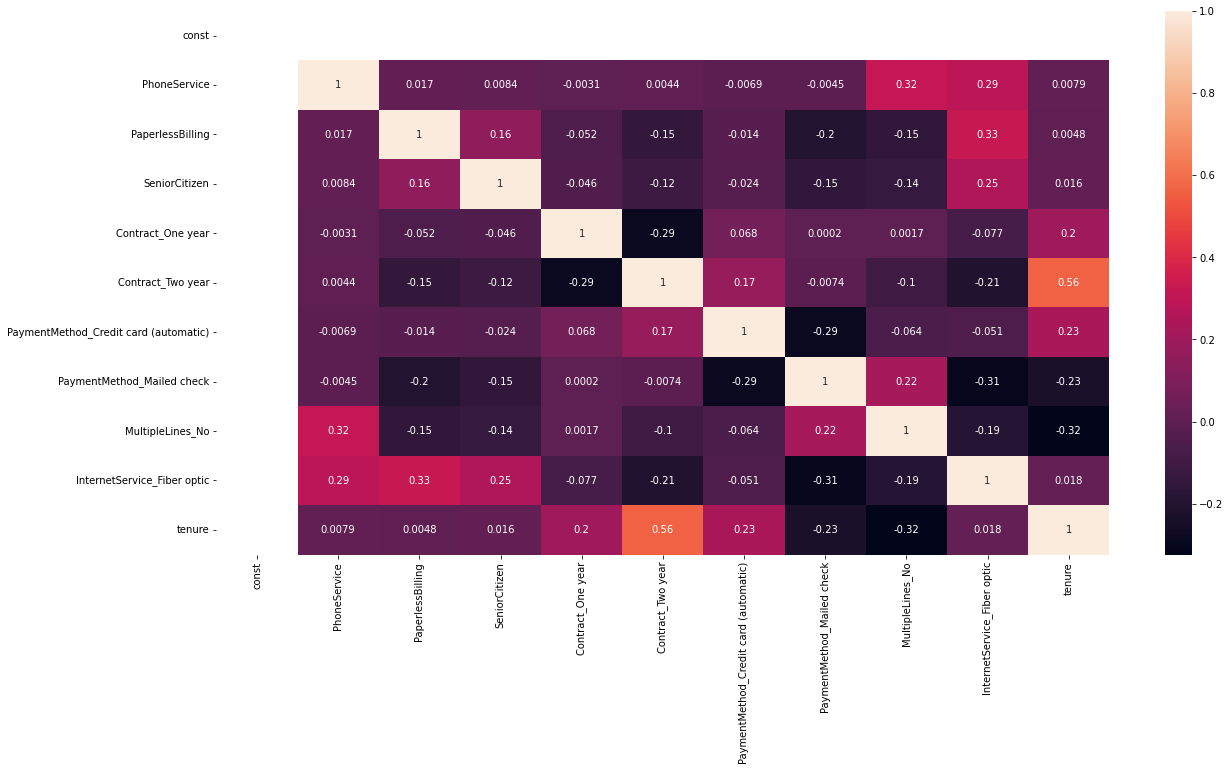

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(X.corr(),annot=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logm2 = sm.Logit(y_train, X_train)
logm2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.420911
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4911
Method:                           MLE   Df Model:                           10
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                  0.2730
Time:                        17:37:31   Log-Likelihood:                -2071.7
converged:                       True   LL-Null:                       -2849.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1111      0.148     -7.527      0.000      -1.400      -0.822
PhoneService                             -0.4970      0.153     -3.239      0.001      -0.798      -0.196
PaperlessBilling                          0.3041      0.087      3.509      0.000       0.134       0.474
SeniorCitizen                             0.3277      0.099      3.314      0.001       0.134       0.521
Contract_One year                        -0.8712      0.127     -6.880      0.000      -1.119      -0.623
Contract_Two year                        -1.6011      0.199     -8.030      0.000      -1.992      -1.210
PaymentMethod_Credit card (automatic)    -0.3824      0.111     -3.459      0.001      -0.599      -0.166
PaymentMethod_Mailed check               -0.3837      0.106     -3.604      0.000      -0.592      -0.175
MultipleLines_No                         -0.3081      0.093     -3.315      0.001      -0.490      -0.126
InternetService_Fiber optic               1.3919      0.099     14.077      0.000       1.198       1.586
tenure                                   -0.8397      0.062    -13.516      0.000      -0.961      -0.718
=========================================================================================================
"""

### **`Feature Selection Using RFE`**

They are significant but  to find out whether they are important 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)         

[False  True False False  True  True False False False  True  True]
[7 1 2 6 1 1 5 4 3 1 1]


In [ ]:
X.columns[(rfe.support_)]

Index(['PhoneService', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'tenure'],
      dtype='object')

In [ ]:
col = ['PhoneService', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'tenure']


In [ ]:
X_train[col]

,PhoneService,Contract_One year,Contract_Two year,InternetService_Fiber optic,tenure
3946,0,0,0,0,-0.954228
3394,1,1,0,0,-0.261630
1635,1,1,0,0,-1.198675
4088,1,0,0,1,-1.035711
1886,1,0,1,0,1.408753
...,...,...,...,...,...
3778,1,0,0,0,-1.198675
5199,1,1,0,1,0.756896
5235,1,0,0,1,-0.954228
5399,1,1,0,0,0.716155


In [ ]:
from sklearn import metrics
logsk =LogisticRegression()
logsk.fit(X_train[col],y_train)


LogisticRegression()

In [ ]:
logm3 = sm.Logit(y_train, X_train[col])
logm3.fit().summary()

Optimization terminated successfully.
         Current function value: 0.433586
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4917
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                  0.2511
Time:                        17:37:35   Log-Likelihood:                -2134.1
converged:                       True   LL-Null:                       -2849.7
Covariance Type:            nonrobust   LLR p-value:                1.147e-308
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
PhoneService                   -1.6164      0.085    -19.003      0.000      -1.783      -1.450
Contract_One year              -1.2987      0.118    -10.994      0.000      -1.530      -1.067
Contract_Two year              -2.1942      0.189    -11.580      0.000      -2.566      -1.823
InternetService_Fiber optic     1.6428      0.089     18.504      0.000       1.469       1.817
tenure                         -0.5845      0.052    -11.161      0.000      -0.687      -0.482
===============================================================================================
"""

In [ ]:
y_pred = logsk.predict_proba( X_test[col])


In [ ]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0,1
0,0.987778,0.012222
1,0.798280,0.201720
2,0.375199,0.624801
3,0.870915,0.129085
4,0.542053,0.457947
...,...,...
2105,0.731373,0.268627
2106,0.926843,0.073157
2107,0.981608,0.018392
2108,0.723249,0.276751


In [ ]:
y_pred_1 = y_pred_df.iloc[:,[1]]

In [ ]:
y_pred_1.head()

,1
0,0.012222
1,0.201720
2,0.624801
3,0.129085
4,0.457947


In [ ]:
y_test_df = pd.DataFrame(y_test)


In [ ]:
y_test_df['CustID']=y_test_df.index


In [ ]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [ ]:
y_pred_final = pd.concat([y_test_df,y_pred_1], axis=1)
y_pred_final

,Churn,CustID,1
0,0,2481,0.012222
1,0,6784,0.201720
2,1,6125,0.624801
3,0,3052,0.129085
4,0,4099,0.457947
...,...,...,...
2105,0,2763,0.268627
2106,0,6747,0.073157
2107,0,1700,0.018392
2108,0,1099,0.276751


In [ ]:
y_pred_final= y_pred_final.rename(columns={1 :'Churn_Prob' })

In [ ]:
y_pred_final

,Churn,CustID,Churn_Prob
0,0,2481,0.012222
1,0,6784,0.201720
2,1,6125,0.624801
3,0,3052,0.129085
4,0,4099,0.457947
...,...,...,...
2105,0,2763,0.268627
2106,0,6747,0.073157
2107,0,1700,0.018392
2108,0,1099,0.276751


In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['CustID', 'Churn','Churn_Prob'])

In [ ]:
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,2481,0,0.012222
1,6784,0,0.201720
2,6125,1,0.624801
3,3052,0,0.129085
4,4099,0,0.457947


In [ ]:
y_pred_final['predicted']= y_pred_final. Churn_Prob.map( lambda x: 1 if x > 0.5 else 0 )

In [ ]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,2481,0,0.012222,0
1,6784,0,0.201720,0
2,6125,1,0.624801,1
3,3052,0,0.129085,0
4,4099,0,0.457947,0


In [ ]:
from sklearn import metrics

In [ ]:
confusion = metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.predicted)
confusion

array([[1374,  175],
       [ 289,  272]], dtype=int64)

In [ ]:
# meaning of above confusion matrix is

# Predicted     not_churn    churn
# Actual
# not_churn        1374     175
# churn            289      272

In [ ]:
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.predicted)

0.7800947867298578

In [ ]:
TP = confusion[1,1]               # true positive 
TN = confusion[0,0]               # true negatives
FP = confusion[0,1]                # false positives
FN = confusion[1,0]                # false negatives

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Churn,y_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.61      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

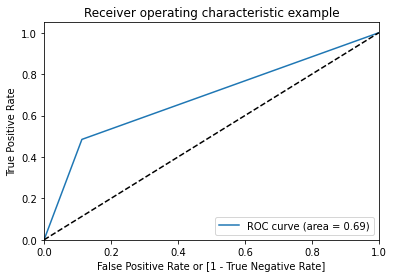

(array([0.        , 0.11297611, 1.        ]),
 array([0.        , 0.48484848, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [ ]:
draw_roc(y_pred_final.Churn,y_pred_final.predicted)

### **`Finding Optimal Cutoff Point`**

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

We cannot randomly take 0.5 & classify as 1 & 0, so need to find cutoff point

In [ ]:
numbers = [float(x)/10 for x in range(10)]

# loop numbers and append churn probability to y_pred_final for different prob cutoff 
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map(lambda x: 1 if x>i else 0)

y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,2481,0,0.012222,0,1,0,0,0,0,0,0,0,0,0
1,6784,0,0.201720,0,1,1,1,0,0,0,0,0,0,0
2,6125,1,0.624801,1,1,1,1,1,1,1,1,0,0,0
3,3052,0,0.129085,0,1,1,0,0,0,0,0,0,0,0
4,4099,0,0.457947,0,1,1,1,1,1,0,0,0,0,0


In [ ]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi' ,'speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#iterate through num
for i in num:
    #calculate confusion metrics
    cm1 = metrics.confusion_matrix(y_pred_final.Churn,y_pred_final[i])
    
    #total in cm1
    total1=sum(sum(cm1))
    
    #Calculate accuracy
    accuracy = (cm1[0,0] + cm1[1,1]) / total1
    
    #calculate specificity
    speci = cm1[0,0]/(cm1[0,0] + cm1[0,1]) 
    
    #calculate sensitivity
    sensi = cm1[1,1]/(cm1[1,0] + cm1[1,1]) 
    
    #append rows in cutoff_df with cutoff values, accuracy, sensitivity and specificity
    cutoff_df.loc[i] = [i, accuracy,sensi,speci]

# print cutoff_df 
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.265877  1.000000  0.000000
0.1   0.1  0.582464  0.941176  0.452550
0.2   0.2  0.668720  0.875223  0.593932
0.3   0.3  0.746445  0.736185  0.750161
0.4   0.4  0.773934  0.609626  0.833441
0.5   0.5  0.780095  0.484848  0.887024
0.6   0.6  0.786256  0.379679  0.933505
0.7   0.7  0.763033  0.122995  0.994835
0.8   0.8  0.734123  0.000000  1.000000
0.9   0.9  0.734123  0.000000  1.000000


<AxesSubplot:xlabel='prob'>

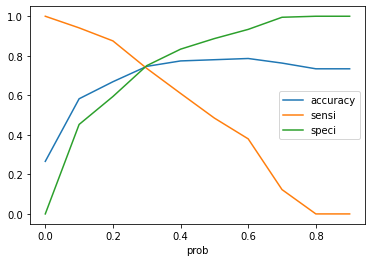

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])


### **`From the curve above, 0.3 is the optimum point to take it as a cutoff probability.`**

In [ ]:
y_pred_final['final_predicted'] = y_pred_final. Churn_Prob.map( lambda x: 1 if x> 0.3 else 0)

In [ ]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,2481,0,0.012222,0,1,0,0,0,0,0,0,0,0,0,0
1,6784,0,0.201720,0,1,1,1,0,0,0,0,0,0,0,0
2,6125,1,0.624801,1,1,1,1,1,1,1,1,0,0,0,1
3,3052,0,0.129085,0,1,1,0,0,0,0,0,0,0,0,0
4,4099,0,0.457947,0,1,1,1,1,1,0,0,0,0,0,1


In [ ]:
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.final_predicted)

0.7464454976303317

In [ ]:
confusion = metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.final_predicted)
confusion

array([[1162,  387],
       [ 148,  413]], dtype=int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
logs2 = LogisticRegression()
logs2.fit(X_train, y_train)
y_pred=logs2.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.52      0.58       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110



In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[1383,  166],
       [ 267,  294]], dtype=int64)

In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.79478672985782

So from above result we can see that our results are improved slightly after using all the features in X